# Regression with Scikit Learn - Machine Learning with Python


### Project Outline

- A typical problem statement for machine learning
- Downloading and exploring a dataset for machine learning
- Linear regression with one variable using Scikit-learn
- Linear regression with multiple variables
- Using categorical features for machine learning
- Other models and techniques for regression using Scikit-learn
- Applying linear regression to other datasets

## Problem Statement

This project takes a practical and coding-focused approach. We'll define the terms _machine learning_ and _linear regression_ in the context of a problem, and later generalize their definitions. We'll work through a typical machine learning problem step-by-step:


> **QUESTION**: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, **you're tasked with creating an automated system to estimate the annual insurance expenditure for new customers**, using information such as their age, sex, BMI, children, smoking habits and region of residence.
>
> Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.
>
> You're given a [CSV file](https://raw.githubusercontent.com/JovianML/opendatasets/master/data/insurance-charges.csv) containing verified historical data, consisting of the aforementioned information and the actual insurance charges incurred by over 1300 customers.
> <img src="https://i.imgur.com/87Uw0aG.png" width="480">
>





We can now create a Pandas dataframe using the downloaded file, to view and analyze the data.

In [ ]:
import pandas as pd  #For loading and manipulating datasets.
import numpy as np

In [87]:
insurance_df = pd.read_csv('C:/Users/Acer/Downloads/Medical_charges-main/insurance.csv')

In [88]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


The dataset contains 1338 rows and 7 columns. Each row of the dataset contains information about one customer.

Our objective is to find a way to estimate the value in the "charges" column using the values in the other columns. If we can do so for the historical data, then we should able to estimate charges for new customers too, simply by asking for information like their age, sex, BMI, no. of children, smoking habits and region.

Let's check the data type for each column.

In [89]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Looks like "age", "children", "bmi" ([body mass index](https://en.wikipedia.org/wiki/Body_mass_index)) and "charges" are numbers, whereas "sex", "smoker" and "region" are strings (possibly categories). None of the columns contain any missing values, which saves us a fair bit of work!

Here are some statistics for the numerical columns:

In [90]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Exploratory Analysis and Visualization

Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "charges" and other columns.

We'll use libraries Matplotlib, Seaborn and Plotly for visualization.

In [ ]:
import plotly.express as px # For creating interactive visualizations (like histograms and box plots).
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### Age

Age is a numeric column. The minimum age in the dataset is 18 and the maximum age is 64. Thus, we can visualize the distribution of age using a histogram with 47 bins (one for each year) and a box plot. We'll use plotly to make the chart interactive, but you can create similar charts using Seaborn.

In [92]:
insurance_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [ ]:


import plotly.express as px

fig = px.histogram(insurance_df,
                   x='age',
                   marginal='box',
                   nbins=47,
                   title='Age Distribution')
fig.update_layout(bargap=0.05)
fig.show()


The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age, except for the ages 18 and 19, which seem to have over twice as many customers as other ages. The uniform distribution might arise from the fact that there isn't a big variation in the [number of people of any given age](https://www.statista.com/statistics/241488/population-of-the-us-by-sex-and-age/) (between 18 & 64) in the USA.



### Body Mass Index

Let's look at the distribution of BMI (Body Mass Index) of customers, using a histogram and box plot.

In [94]:
fig = px.histogram(insurance_df,
                   x = 'bmi',
                   marginal='box',
                   title='Age Distribution')
fig.update_layout(bargap=0.05)
fig.show()

The measurements of body mass index seem to form a [Gaussian distribution](https://en.wikipedia.org/wiki/Normal_distribution) centered around the value 30, with a few outliers towards the right. Here's how BMI values can be interpreted ([source](https://study.com/academy/lesson/what-is-bmi-definition-formula-calculation.html)):

![](https://i.imgur.com/lh23OiY.jpg)


### Charges

Let's visualize the distribution of "charges" i.e. the annual insurance charges for customers. This is the column we're trying to predict. Let's also use the categorical column "smoker" to distinguish the charges for smokers and non-smokers.

<Axes: xlabel='charges', ylabel='Count'>

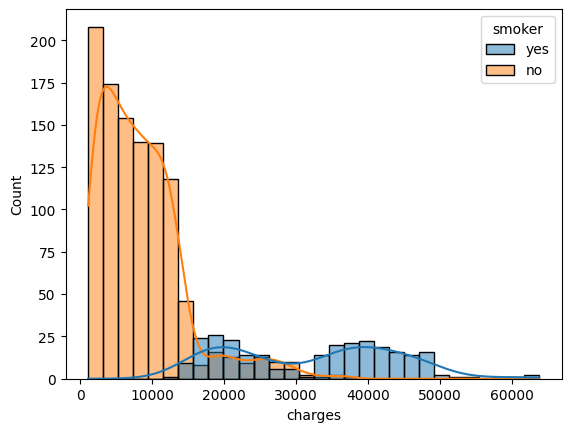

In [165]:
sns.histplot(insurance_df, x='charges', hue='smoker', kde=True, bins=30)


In [166]:
fig = px.histogram(insurance_df,
             x='charges',
             marginal='box',
             title = 'Annual charges',
             color='smoker')
fig.update_layout(bargap=0.05)
fig.show()

We can make the following observations from the above graph:

* For most customers, the annual insurance charges are under \\$10,000. Only a small fraction of customer have higher insurance expenses, possibly due to accidents, major illnesses and genetic diseases. The distribution follows a "power law"
* There is a significant difference in insurance expenses between smokers and non-smokers. While the median for non-smokers is \\$7300, the median for smokers is close to \\$35,000.


### Smoker

Let's visualize the distribution of the "smoker" column (containing values "yes" and "no") using a histogram.

In [97]:
px.histogram(insurance_df, x='smoker',color='sex')

It appears that 20% of customers have reported that they smoke. Can you verify whether this matches the national average, assuming the data was collected in 2010? We can also see that smoking appears a more common habit among males. Can you verify this?



Having looked at individual columns, we can now visualize the relationship between "charges" (the value we wish to predict) and other columns.

### Age and Charges

Let's visualize the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points.

In [167]:
px.scatter(insurance_df,
           x ='age',
           marginal_x='box',
           marginal_y='box',
           y = 'charges',
           color='smoker',
           title = 'Age VS charges')

We can make the following observations from the above chart:

* The general trend seems to be that insurance charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine insurance charges.


* We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

     1. The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low insurance charges compared to others
     
     2. The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with insurance issues" and "smokers without major insurance issues".
     
     3. The final cluster consists exclusively of smokers, presumably smokers with major insurance issues that are possibly related to or worsened by smoking.
     

### BMI and Charges

Let's visualize the relationship between BMI (body mass index) and charges using another scatter plot. Once again, we'll use the values from the "smoker" column to color the points.

In [168]:
px.scatter(insurance_df,
           x = 'bmi',
           marginal_x='box',
           marginal_y='box',
           y ='charges',
           color = 'smoker',
           title = 'BMI VS charges')

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in insurance charges. However, insurance charges seem to be significantly higher for smokers with a BMI greater than 30.

What other insights can you gather from the above graph?

### Correlation

As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

This relationship is often expressed numerically using a measure called the _correlation coefficient_, which can be computed using the `.corr` method of a Pandas series.

In [ ]:
insurance_df.charges.corr(insurance_df.age)   #As age increases, charges tend to increase, but not perfectly.

np.float64(0.2990081933306478)

In [101]:
insurance_df.charges.corr(insurance_df.bmi)

np.float64(0.19834096883362887)

In [102]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To compute the correlation for categorical columns, they must first be converted into numeric columns.

In [103]:
smoker_val = {'no':0,'yes':1}
smoker_num = insurance_df.smoker.map(smoker_val)
insurance_df.charges.corr(smoker_num)

np.float64(0.7872514304984778)




Here's how correlation coefficients can be interpreted ([source](https://statisticsbyjim.com/basics/correlations)):

* **Strength**: The greater the absolute value of the correlation coefficient, the stronger the relationship.

    * The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.

    * A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.
    
    * When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.


* **Direction**: The sign of the correlation coefficient represents the direction of the relationship.

    * Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.
    
    * Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.

Here's the same relationship expressed visually ([source](https://www.cuemath.com/data/how-to-calculate-correlation-coefficient/)):

<img src="https://i.imgur.com/3XUpDlw.png" width="360">

Pandas dataframes also provide a `.corr` method to compute the correlation coefficients between all pairs of numeric columns.

## Linear Regression using a Single Feature

We now know that the "smoker" and "age" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers.

In [104]:
non_smoker_df = insurance_df[insurance_df.smoker == 'no']
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [169]:
smoker_df = insurance_df[insurance_df.smoker == 'yes']
smoker_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
11,62,female,26.290,0,yes,southeast,27808.72510,1,0,0.0,0.0,1.0,0.0
14,27,male,42.130,0,yes,southeast,39611.75770,1,1,0.0,0.0,1.0,0.0
19,30,male,35.300,0,yes,southwest,36837.46700,1,1,0.0,0.0,0.0,1.0
23,34,female,31.920,1,yes,northeast,37701.87680,1,0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600,1,0,0.0,0.0,0.0,1.0
1314,30,female,23.655,3,yes,northwest,18765.87545,1,0,0.0,1.0,0.0,0.0
1321,62,male,26.695,0,yes,northeast,28101.33305,1,1,1.0,0.0,0.0,0.0
1323,42,female,40.370,2,yes,southeast,43896.37630,1,0,0.0,0.0,1.0,0.0


Next, let's visualize the relationship between "age" and "charges"

<Axes: xlabel='age', ylabel='charges'>

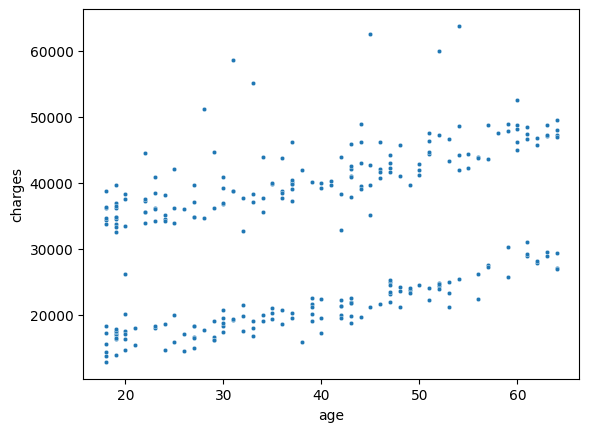

In [170]:
sns.scatterplot(data=smoker_df, x='age',y='charges',s=10)

<Axes: xlabel='age', ylabel='charges'>

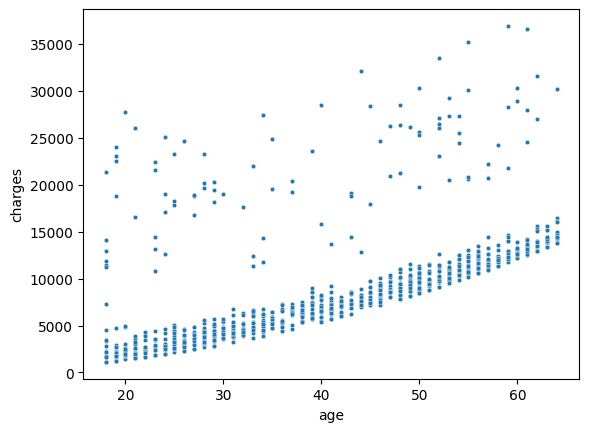

In [105]:
sns.scatterplot(data=non_smoker_df, x='age',y='charges',s=10)

Apart from a few exceptions, the points seem to form a line. We'll try and "fit" a line using this points, and use the line to predict charges for a given age. A line on the X&Y coordinates has the following formula:

$y = wx + b$

The line is characterized two numbers: $w$ (called "slope") and $b$ (called "intercept").

### Model

In the above case, the x axis shows "age" and the y axis shows "charges". Thus, we're assuming the following relationship between the two:

$charges = w \times age + b$

We'll try determine $w$ and $b$ for the line that best fits the data.

* This technique is called _linear regression_, and we call the above equation a _linear regression model_, because it models the relationship between "age" and "charges" as a straight line.

* The numbers $w$ and $b$ are called the _parameters_ or _weights_ of the model.

* The values in the "age" column of the dataset are called the _inputs_ to the model and the values in the charges column are called "targets".

Let define a helper function `estimate_charges`, to compute $charges$, given $age$, $w$ and $b$.


In [171]:
def estimate_charges(age, w, b):
  return w * age + b

The `estimate_charges` function is our very first _model_.

Let's _guess_ the values for $w$ and $b$ and use them to estimate the value for charges.

In [172]:
w = 50
b = 100

In [173]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)

We can plot the estimated charges using a line graph.

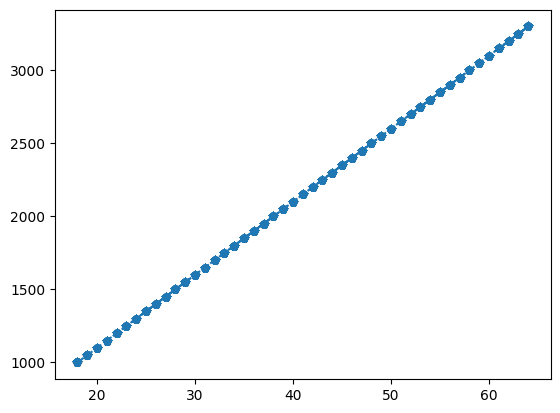

In [182]:
plt.plot(ages,estimated_charges, 'p--')

As expected, the points lie on a straight line.

We can overlay this line on the actual data, so see how well our _model_ fits the _data_.

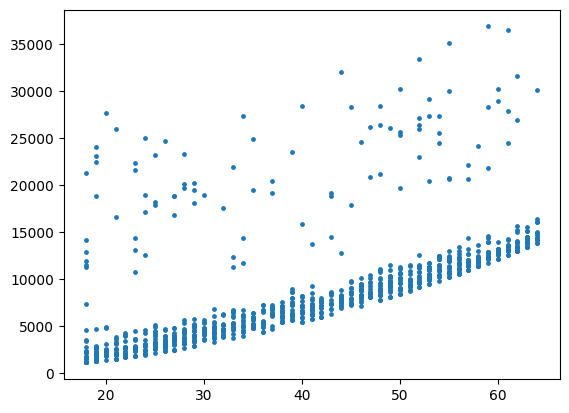

In [186]:
target = non_smoker_df.charges
plt.scatter(ages,target,s=6)

Text(0, 0.5, 'charges')

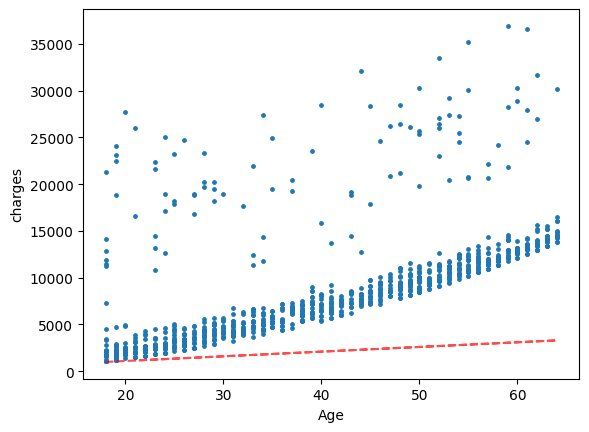

In [192]:
target = non_smoker_df.charges
plt.plot(ages,estimated_charges, 'r--',alpha=0.7)
plt.scatter(ages,target,s=6)
plt.xlabel('Age')
plt.ylabel("charges")

Clearly, the our estimates are quite poor and the line does not "fit" the data. However, we can try different values of $w$ and $b$ to move the line around. Let's define a helper function `try_parameters` which takes `w` and `b` as inputs and creates the above plot.

In [177]:
def try_parameters(w, b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges

  estimated_charges = estimate_charges(ages, w, b)

  plt.plot(ages,estimated_charges, 'r-o',alpha=0.7)
  plt.scatter(ages,target,s=6)
  plt.xlabel('Age')
  plt.ylabel("charges")

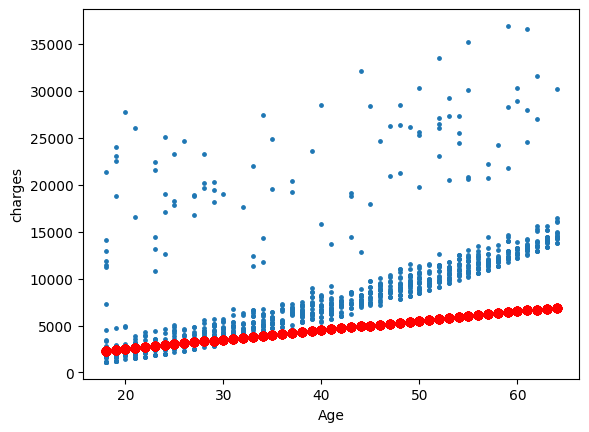

In [178]:
try_parameters(100, 500)

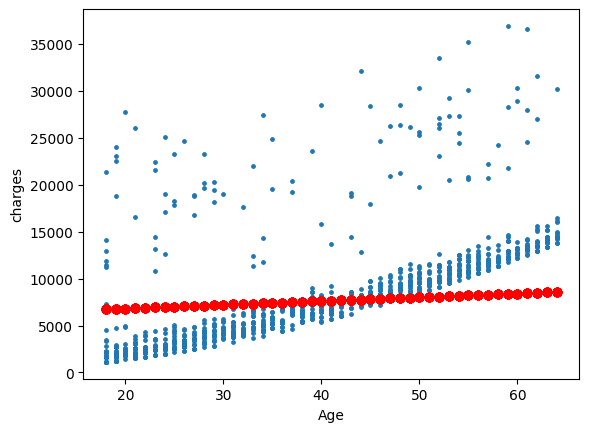

In [179]:
try_parameters(40, 6000)

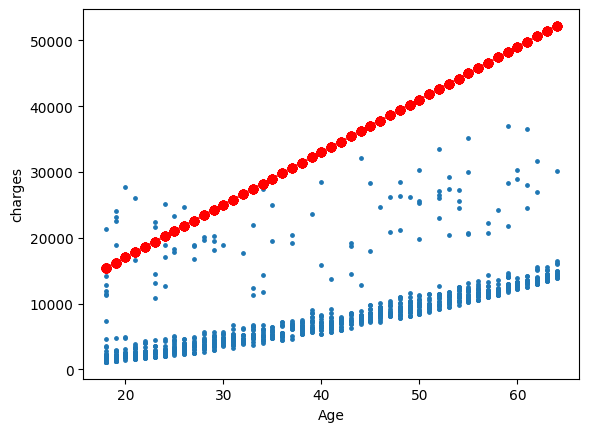

In [194]:
try_parameters(800,1000)

### Loss/Cost Function

We can compare our model's predictions with the actual targets using the following method:

* Calculate the difference between the targets and predictions (the differenced is called the "residual")
* Square all elements of the difference matrix to remove negative values.
* Calculate the average of the elements in the resulting matrix.
* Take the square root of the result

The result is a single number, known as the **root mean squared error** (RMSE). The above description can be stated mathematically as follows:

<img src="https://i.imgur.com/WCanPkA.png" width="360">

Geometrically, the residuals can be visualized as follows:

<img src="https://i.imgur.com/ll3NL80.png" width="420">

Let's define a function to compute the RMSE.

In [115]:
def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(targets - predictions)))

In [116]:
w = 50
b = 100

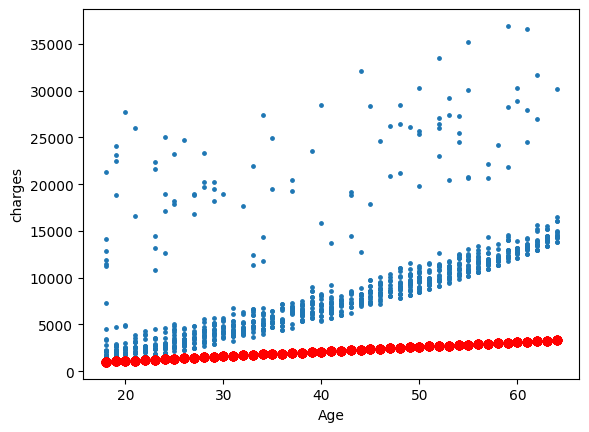

In [117]:
try_parameters(w, b)

Let's compute the RMSE for our model with a sample set of weights

In [118]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [119]:
rmse(targets, predicted)

np.float64(8461.949562575493)

In [120]:
insurance_df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Here's how we can interpret the above number: *On average, each element in the prediction differs from the actual target by \\$8461*.

The result is called the *loss* because it indicates how bad the model is at predicting the target variables. It represents information loss in the model: the lower the loss, the better the model.

Let's modify the `try_parameters` functions to also display the loss.

In [ ]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8,alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual'])

    loss = rmse(targets, predictions)
    print("RMSE LOSS:" ,loss)

RMSE LOSS: 8461.949562575493


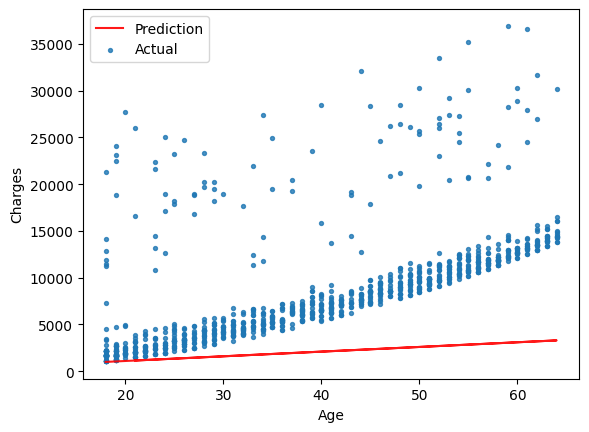

In [122]:
try_parameters(50, 100)

RMSE LOSS: 6096.521929033013


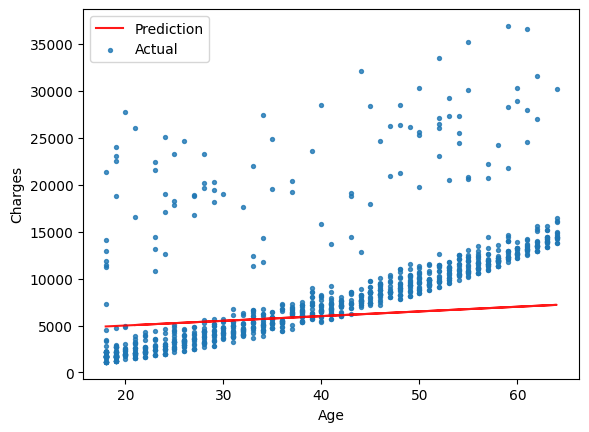

In [123]:
try_parameters(50, 4000)

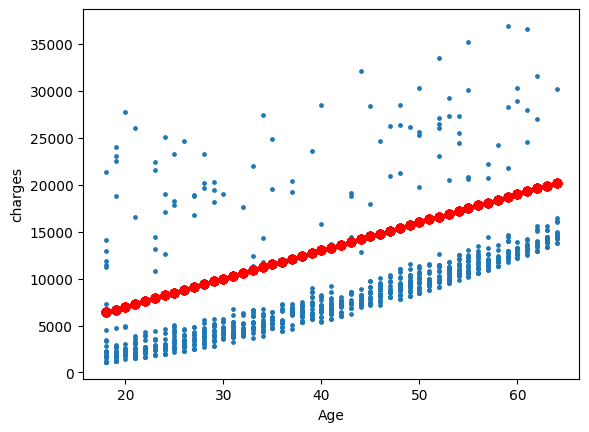

In [199]:
try_parameters(300,1000)

### Linear Regression using Scikit-learn

In practice, you'll never need to implement either of the above methods yourself. You can use a library like `scikit-learn` to do this for you.

In [ ]:
from sklearn.linear_model import LinearRegression #Scikit-learn's model for performing linear regression.

Let's use the `LinearRegression` class from `scikit-learn` to find the best fit line for "age" vs. "charges" using the ordinary least squares optimization technique.

First, we create a new model object.

In [125]:
model = LinearRegression()
model

LinearRegression()

Next, we can use the `fit` method of the model to find the best fit line for the inputs and targets.

Not that the input `X` must be a 2-d array, so we'll need to pass a dataframe, instead of a single column.

In [203]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('Inputs.Shape:',inputs.shape)
print('Targets.Shape:',targets.shape)

Inputs.Shape: (1064, 1)
Targets.Shape: (1064,)


Let's fit the model to the data.

In [204]:
model.fit(inputs, targets)

LinearRegression()

We can now make predictions using the model. Let's try predicting the charges for the ages 23, 37 and 61

In [205]:
model.predict(np.array([[23],
                       [50],
                       [60]]))

C:\Users\Acer\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855, 11271.02508499, 13943.51421331])

In [206]:
model.fit(inputs, targets)
model.predict(np.array([[23],
                       [37],
                       [61]]))

C:\Users\Acer\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

Do these values seem reasonable? Compare them with the scatter plot above.

Let compute the predictions for the entire set of inputs

In [129]:
inputs

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [130]:
predictions = model.predict(inputs)

In [131]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289], shape=(1064,))

Let's compute the RMSE loss to evaluate the model.

In [132]:
rmse(targets, predictions)

np.float64(4662.505766636395)

Seems like our prediction is off by $4000 on average, which is not too bad considering the fact that there are several outliers.

The parameters of the model are stored in the `coef_` and `intercept_` properties.

In [133]:
model.intercept_

np.float64(-2091.4205565650864)

In [134]:
model.coef_

array([267.24891283])

Are these parameters close to your best guesses?

Let's visualize the line created by the above parameters.

RMSE LOSS: 4662.505766636395


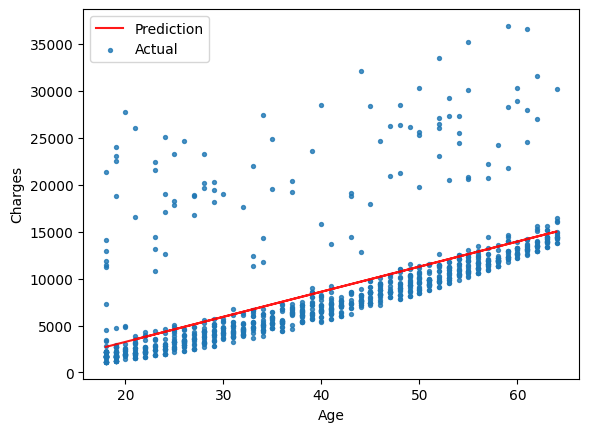

In [135]:
try_parameters(model.coef_, model.intercept_)

### Machine Learning
 Machine learning is simply the process of computing the best parameters to model the relationship between some feature and targets.

Every machine learning problem has three components:

1. **Model**

2. **Cost Function**

3. **Optimizer**

 Here's how the relationship between these three components can be visualized:

<img src="https://i.imgur.com/oiGQFJ9.png" width="480">

As we've seen above, it takes just a few lines of code to train a machine learning model using `scikit-learn`.

In [136]:
# create inputs and targets
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

# create and train model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# compute the loss
loss = rmse(targets, predictions)
print('Loss: ',loss)

Loss:  4662.505766636395


## Linear Regression using Multiple Features

So far, we've used on the "age" feature to estimate "charges". Adding another feature like "bmi" is fairly straightforward. We simply assume the following relationship:

$charges = w_1 \times age + w_2 \times bmi + b$

We need to change just one line of code to include the BMI.

In [137]:
# create inputs and targets
inputs, targets = non_smoker_df[['age','bmi','children']], non_smoker_df['charges']

# create and train model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# compute the loss
loss = rmse(targets, predictions)
print('Loss: ',loss)

Loss:  4608.470405038246


As you can see, adding the BMI doesn't seem to reduce the loss by much, as the BMI has a very weak correlation with charges, especially for non smokers.

In [138]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

np.float64(0.08403654312833271)

In [139]:
px.scatter(non_smoker_df, x='bmi',y='charges')

In [140]:
model.coef_, model.intercept_

(array([265.2938443 ,   5.27956313, 580.65965053]),
 np.float64(-2809.297603223591))

Let's go one step further, and add the final numeric column: "children", which seems to have some correlation with "charges".

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + b$

In [141]:
non_smoker_df.charges.corr(non_smoker_df.children)

np.float64(0.13892870453542205)

In [142]:
px.strip(non_smoker_df, x="children", y ='charges')

In [208]:
# create inputs and targets
inputs, targets = non_smoker_df[['age','bmi','children']], non_smoker_df['charges']

# create and train model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# compute the loss
loss = rmse(targets, predictions)
print('Loss for non smokers: ',loss)

Loss for non smokers:  4608.470405038246


Once again, we don't see a big reduction in the loss, even though it's greater than in the case of BMI.

In [209]:
inputs, targets = smoker_df[['age','bmi','children']],smoker_df['charges']

# create and train model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# compute the loss
loss = rmse(targets, predictions)
print('Loss for smokers : ',loss)

Loss for smokers :  5718.202480524154


In [144]:
inputs, targets = insurance_df[['age','bmi','children']], insurance_df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11355.317901125973


In [145]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Using Categorical Features for Machine Learning

So far we've been using only numeric columns, since we can only perform computations with numbers. If we could use categorical columns like "smoker", we can train a single model for the entire dataset.

To use the categorical columns, we simply need to convert them to numbers. There are three common techniques for doing this:

1. If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and 1.
2. If a categorical column has more than 2 categories, we can perform one-hot encoding i.e. create a new column for each category with 1s and 0s.
3. If the categories have a natural order (e.g. cold, neutral, warm, hot), then they can be converted to numbers (e.g. 1, 2, 3, 4) preserving the order. These are called ordinals




## Binary Categories

The "smoker" category has just two values "yes" and "no". Let's create a new column "smoker_code" containing 0 for "no" and 1 for "yes".


<Axes: xlabel='smoker', ylabel='charges'>

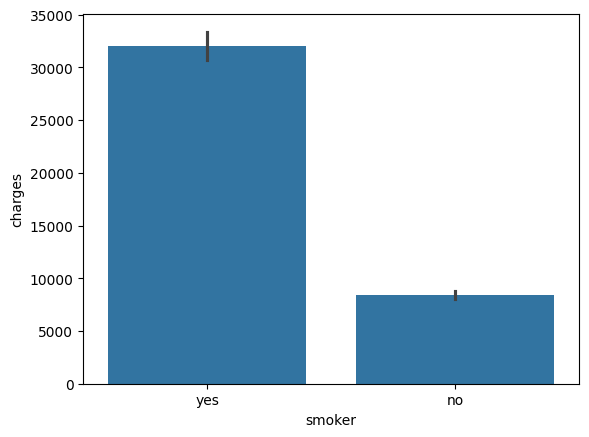

In [146]:
sns.barplot(data=insurance_df, x='smoker',y ='charges')

In [147]:
smoker_codes = {'no':0, 'yes': 1}
insurance_df['smoker_code'] = insurance_df.smoker.map(smoker_codes)

In [148]:
insurance_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [149]:
insurance_df.charges.corr(insurance_df.smoker_code)

np.float64(0.7872514304984778)

We can now use the `smoker_df` column for linear regression.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + b$

In [150]:
# create inputs and targets
inputs, targets = insurance_df[['age','bmi','children','smoker_code']], insurance_df['charges']

# create and train model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# compute the loss
loss = rmse(targets, predictions)
print('Loss: ',loss)

Loss:  6056.439217188081


The loss reduces from `11355` to `6056`, almost by 50%! This is an important lesson: never ignore categorical data.


Let's try adding the "sex" column as well.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + b$

<Axes: xlabel='sex', ylabel='charges'>

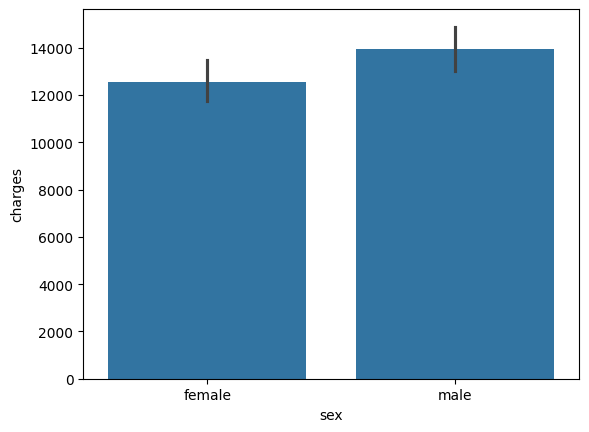

In [151]:
sns.barplot(data= insurance_df, x = 'sex',y ='charges')

In [152]:
sex_code = {'female': 0 , 'male': 1 }

In [153]:
insurance_df['sex_code'] = insurance_df.sex.map(sex_code)

In [154]:
insurance_df.charges.corr(insurance_df.sex_code)

np.float64(0.05729206220202533)

In [155]:
# create inputs and targets
inputs, targets = insurance_df[['age','bmi','children','sex_code','smoker_code']], insurance_df['charges']

# create and train model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# compute the loss
loss = rmse(targets, predictions)
print('Loss: ',loss)

Loss:  6056.100708754546


As you might expect, this does have a significant impact on the loss.


### One-hot Encoding

The "region" column contains 4 values, so we'll need to use hot encoding and create a new column for each region.

![](https://i.imgur.com/n8GuiOO.png)


<Axes: xlabel='region', ylabel='charges'>

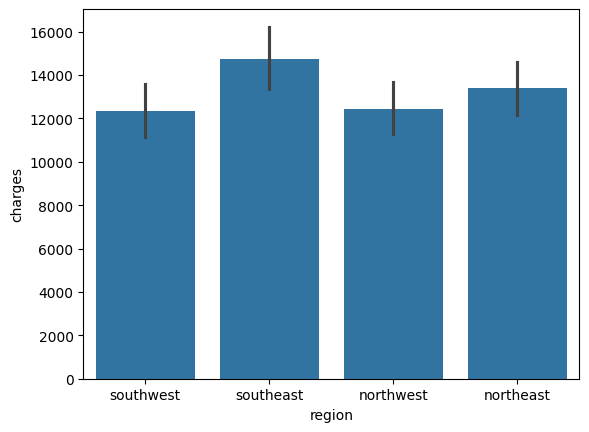

In [210]:
sns.barplot(data = insurance_df, x = 'region', y = 'charges')

In [157]:
from sklearn import preprocessing
encode = preprocessing.OneHotEncoder()
encode.fit(insurance_df[['region']])
encode.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [158]:
one_hot = encode.transform(insurance_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], shape=(1338, 4))

In [159]:
insurance_df[['northeast','northwest','southeast','southwest']] = one_hot

In [160]:
insurance_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


Let's include the region columns into our linear regression model.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

In [161]:
# create inputs and targets
inputs, targets = insurance_df[['age','bmi','children','sex_code','smoker_code','northeast','northwest','southeast','southwest']], insurance_df['charges']

# create and train model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# compute the loss
loss = rmse(targets, predictions)
print('Loss: ',loss)

Loss:  6041.679651174452


In [162]:
from sklearn.ensemble import RandomForestRegressor

In [211]:
inputs, targets = insurance_df[['age','bmi','children','sex_code','smoker_code','northeast','northwest','southeast','southwest']], insurance_df['charges']

# create and train model
model_rf = RandomForestRegressor().fit(inputs, targets)

# Generate predictions
predictions = model_rf.predict(inputs)

# compute the loss
loss = rmse(targets, predictions)
print('Loss for random forest : ',loss)

Loss for random forest :  1845.481064798874


In [ ]:
model_rf.predict([[19,24,0,0,0,0,0,0,1]])  #smoker

C:\Users\Acer\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



array([1775.0338455])

In [ ]:
model_rf.predict([[19,24,0,0,0,0,0,0,0]])  #non-smoker

C:\Users\Acer\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



array([1832.6909865])